In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib import colors
import matplotlib.ticker as ticker
import os
import json
import sys
sys.path.append('..')
sys.path.append('../lib')
from lib import *
plt.style.use('../peptidome.mplstyle')
import logging
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp
import seaborn as sns

import scipy.stats

# figdatadir = './'



## For the original analayses and data derivation see https://github.com/andim/peptidome/tree/master/code/nndist and https://github.com/andim/peptidome/blob/master/code/maxent/

In [7]:
datadir = '../data/generated_data'
k=9

In [8]:
uniform_matrix =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [9]:
malaria_independent_params = np.load(f'{datadir}/Malaria_independent_k9_params.npz')
virus_independent_params = np.load(f'{datadir}/Humanviruses_independent_k9_params.npz')

In [10]:
human_independent_params = np.load(f'{datadir}/Human_independent_k9_params.npz')
human_independent_params

NpzFile '../data/generated_data/Human_independent_k9_params.npz' with keys: f

In [11]:
malaria_shuffled_array = malaria_independent_params['f'].copy()
malaria_shuffled_again = malaria_independent_params['f'].copy()
np.random.shuffle(malaria_shuffled_array)
np.random.shuffle(malaria_shuffled_again)

In [12]:
virus_shuffled_array = virus_independent_params['f'].copy()
virus_shuffled_again = virus_independent_params['f'].copy()
np.random.shuffle(virus_shuffled_array)
np.random.shuffle(virus_shuffled_again)

In [13]:
# malaria_alt = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_independent_params['f'])


In [14]:
malaria_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_array)
malaria_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_shuffled_again)

virus_shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_array)
virus_shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=virus_shuffled_again)

In [15]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [16]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [17]:
models = [
'Humanviruses_independent',
'Humanviruses_ncov',
'Humanviruses_nskew',
'Humanviruses_nskewfcov',
'Humanviruses_train',
'Malaria_independent',
'Malaria_ncov',
'Malaria_nskew',
'Malaria_nskewfcov',
'Malaria_train',
'Malaria_test',
'Mouse_train',
'uniform',
'Human_nskewfcov'
]

In [18]:
ns_dict = {}
ps_dict = {}
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self_no_sampling.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

In [20]:
# ns_dict['uniform'] = mat_to_dist(uniform_matrix)
# ps_dict['uniform'] = ns_dict['uniform']/np.sum(ns_dict['uniform'])
ps_dict['uniform'][0] = len(reference)/20**k

In [22]:
ns_dict['virus_shuffled_independent'] = mat_to_dist(virus_shuffled_matrix)
ps_dict['virus_shuffled_independent'] = ns_dict['virus_shuffled_independent']/np.sum(ns_dict['virus_shuffled_independent'])

ns_dict['virus_shuffled_independent2'] = mat_to_dist(virus_shuffled_matrix_2)
ps_dict['virus_shuffled_independent2'] = ns_dict['virus_shuffled_independent2']/np.sum(ns_dict['virus_shuffled_independent2'])

In [23]:
ns_dict['malaria_shuffled_independent'] = mat_to_dist(malaria_shuffled_matrix)
ps_dict['malaria_shuffled_independent'] = ns_dict['malaria_shuffled_independent']/np.sum(ns_dict['malaria_shuffled_independent'])

ns_dict['malaria_shuffled_independent2'] = mat_to_dist(malaria_shuffled_matrix_2)
ps_dict['malaria_shuffled_independent2'] = ns_dict['malaria_shuffled_independent2']/np.sum(ns_dict['malaria_shuffled_independent2'])

In [24]:
freq_df = pd.DataFrame(data=[
    human_independent_params['f'],
    malaria_independent_params['f'].copy(),
    virus_independent_params['f'].copy(),
    malaria_shuffled_array,
    virus_shuffled_array
    ],columns=list(aminoacids),index=['Human','Malaria','Virus','Malaria Shuffled', 'Virus Shuffled'])
freq_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Human,0.070664,0.022891,0.047465,0.070871,0.036768,0.066172,0.026091,0.043486,0.056739,0.100549,0.019687,0.035902,0.063418,0.047818,0.056600,0.082994,0.053266,0.059889,0.012197,0.026534
Malaria,0.019618,0.017968,0.063957,0.070856,0.044345,0.028318,0.024240,0.093673,0.118140,0.077035,0.020677,0.141612,0.019698,0.027805,0.026556,0.064407,0.040829,0.037535,0.004909,0.057823
Virus,0.077774,0.023660,0.050071,0.054126,0.038742,0.062523,0.025116,0.051574,0.047460,0.095090,0.019752,0.041658,0.061661,0.034560,0.065769,0.075220,0.063620,0.066281,0.013112,0.032231
Malaria Shuffled,0.004909,0.028318,0.064407,0.024240,0.019618,0.070856,0.063957,0.044345,0.027805,0.037535,0.019698,0.141612,0.077035,0.040829,0.017968,0.026556,0.118140,0.057823,0.020677,0.093673
Virus Shuffled,0.032231,0.034560,0.066281,0.062523,0.095090,0.077774,0.061661,0.025116,0.051574,0.050071,0.054126,0.063620,0.023660,0.013112,0.065769,0.075220,0.038742,0.047460,0.019752,0.041658


In [30]:
logging.getLogger('matplotlib.font_manager').disabled = True

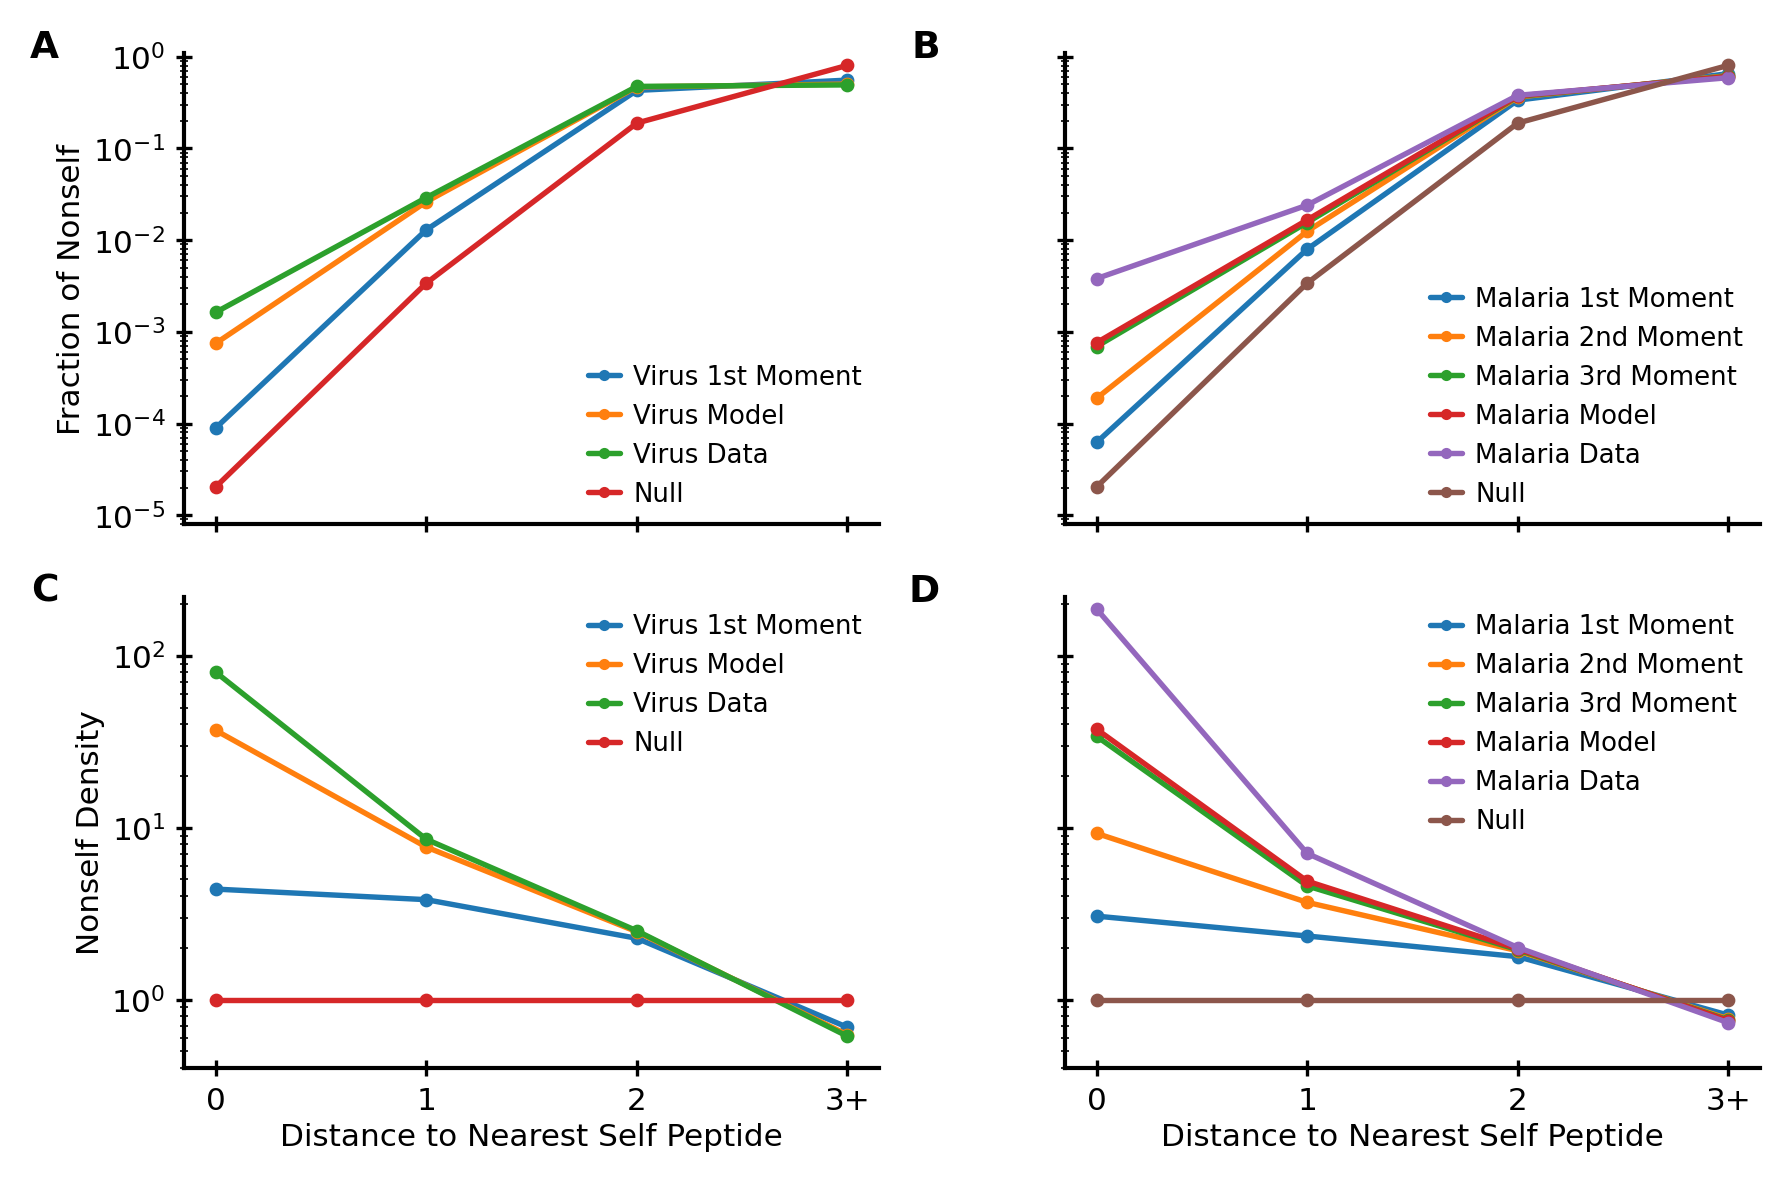

In [32]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

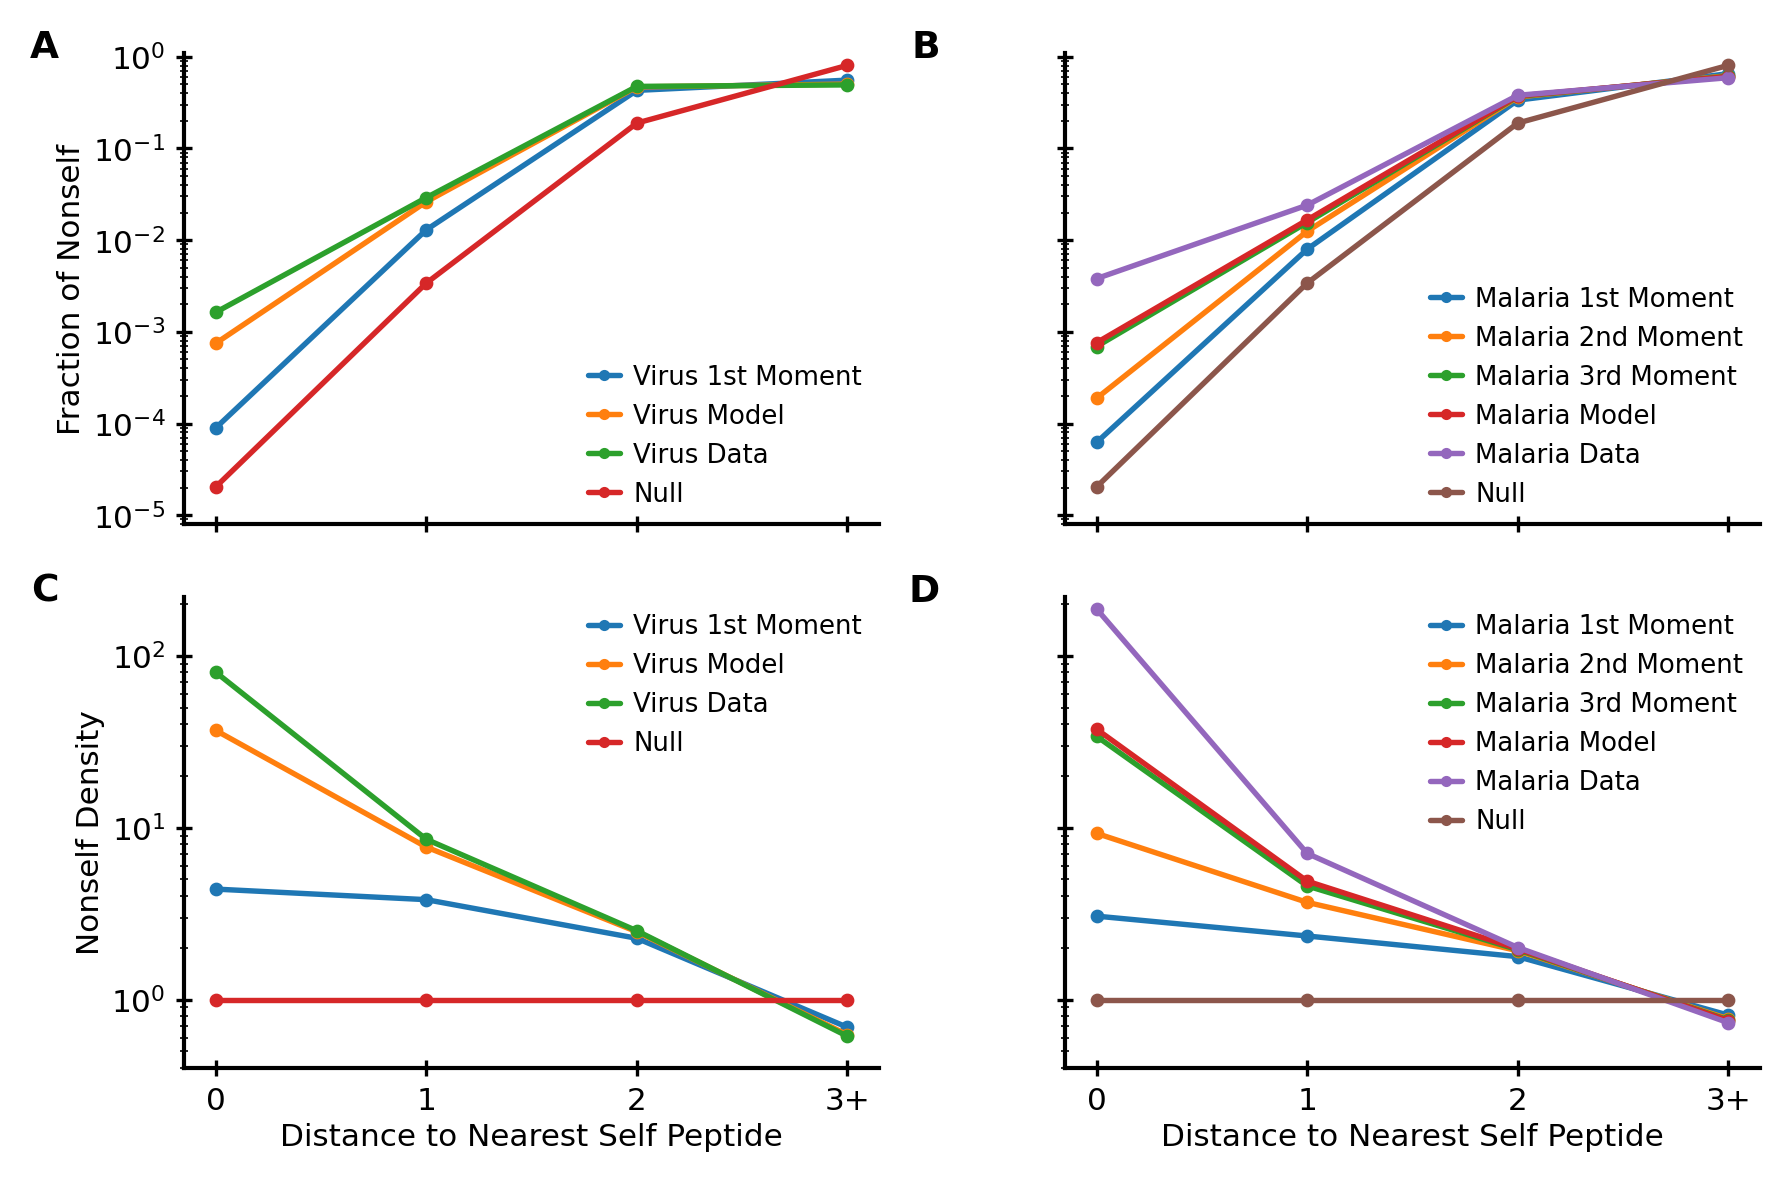

In [34]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

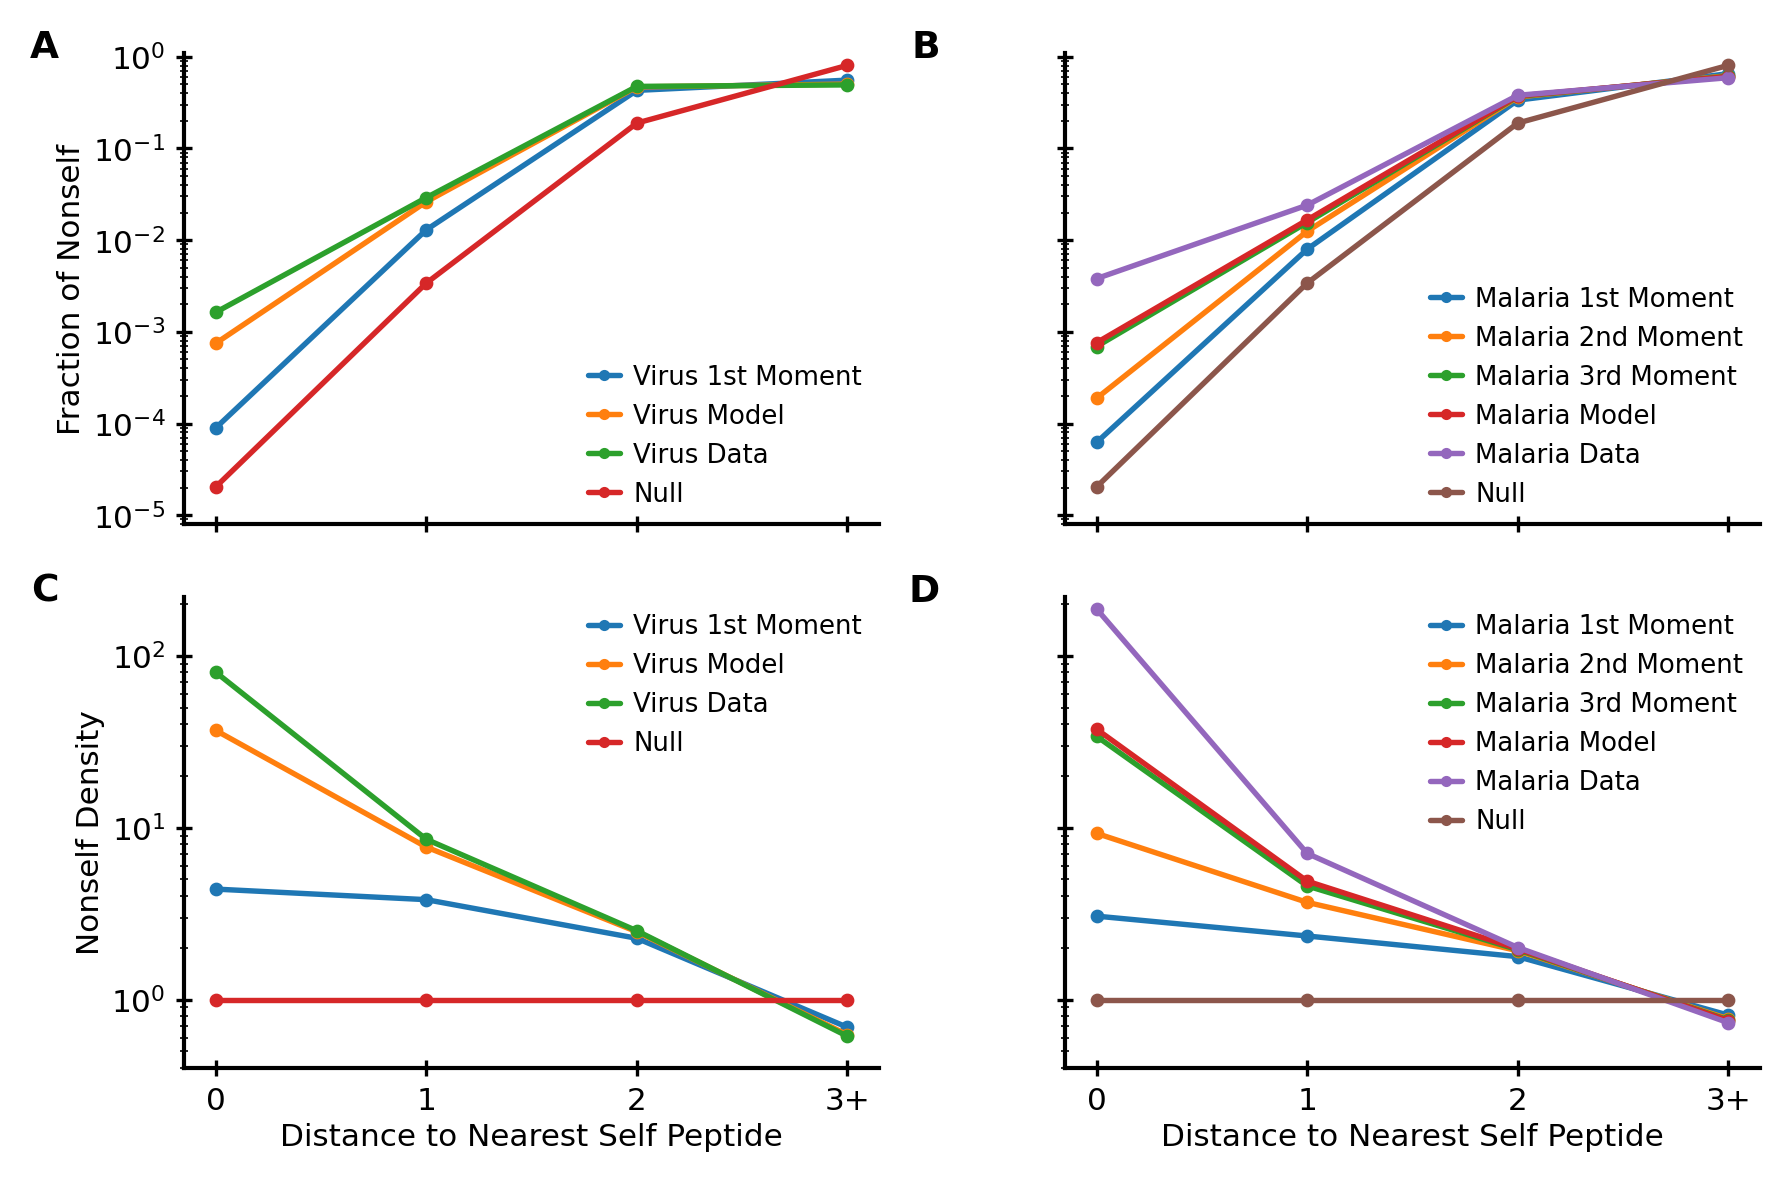

In [35]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')]

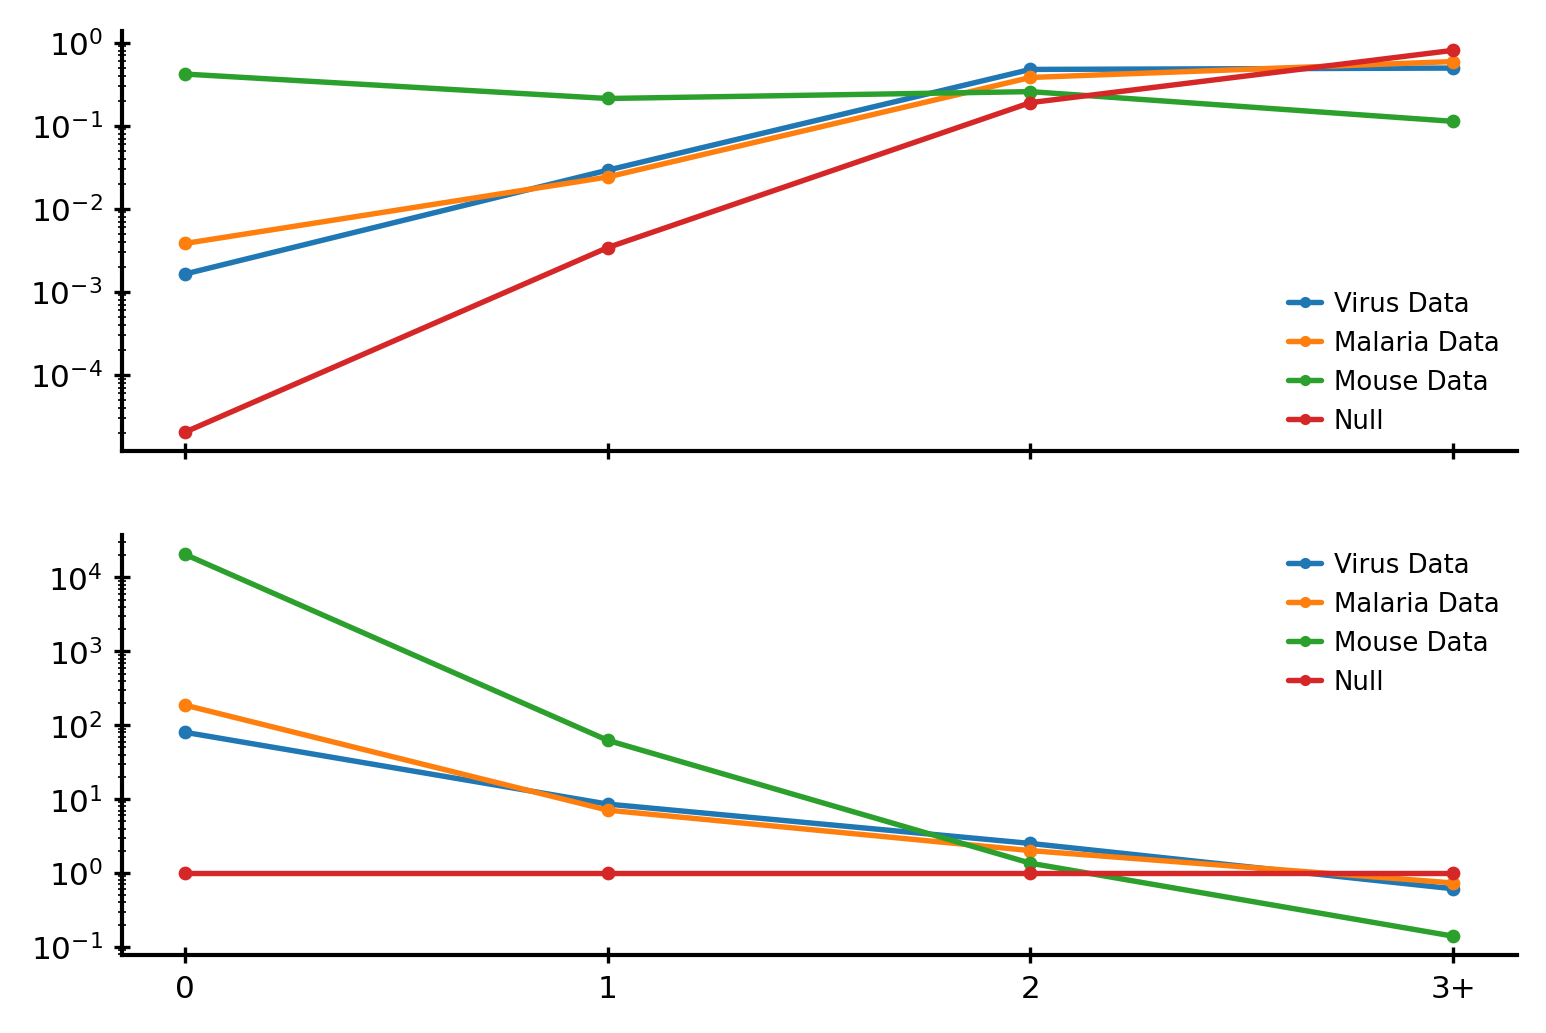

In [36]:
fig, ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=1,sharex=True)
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_train','Malaria_train','Mouse_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    ax[0].plot(range(4), ps, '-o', label=model_to_label[model])
    ax[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([0, 1, 2, '3+'])



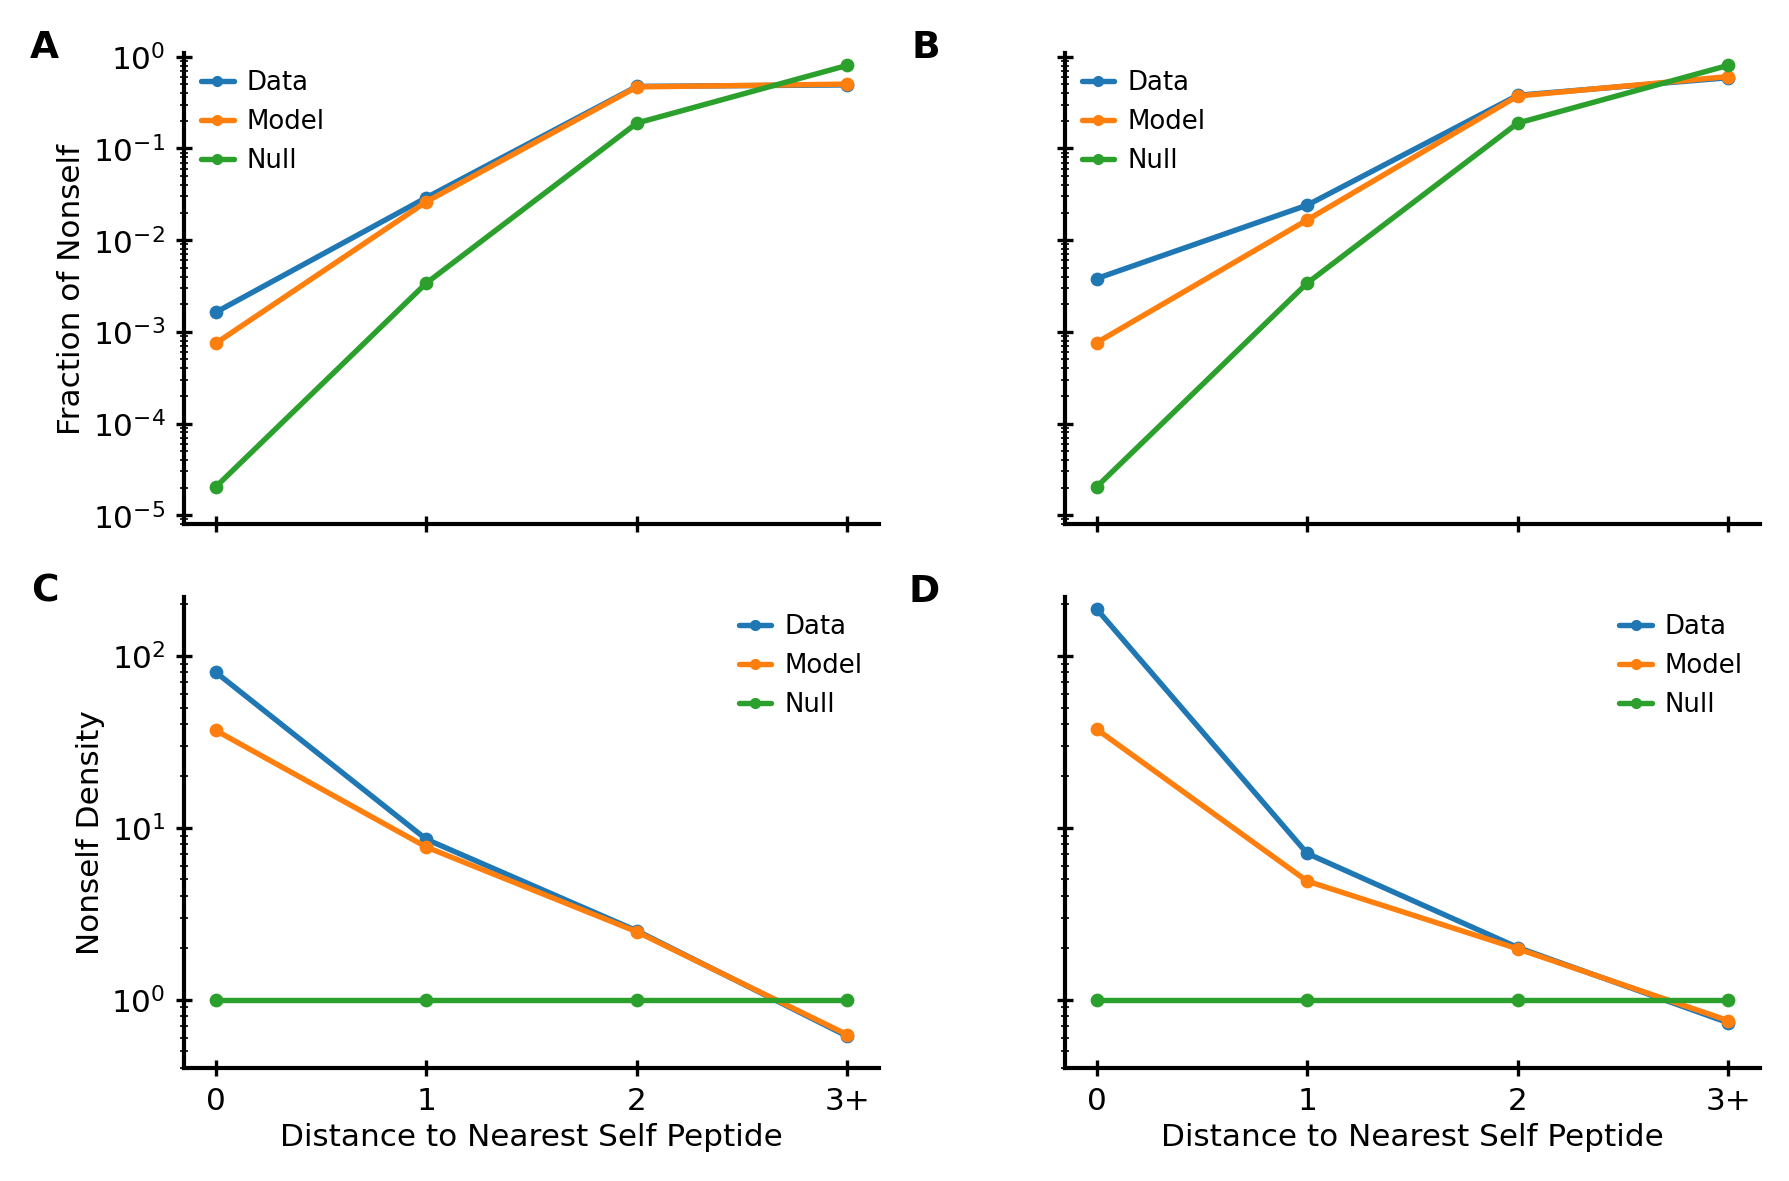

In [37]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(float)
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../fig3_not_annotated.png')
# plt.savefig('../fig3_not_annotated.svg')

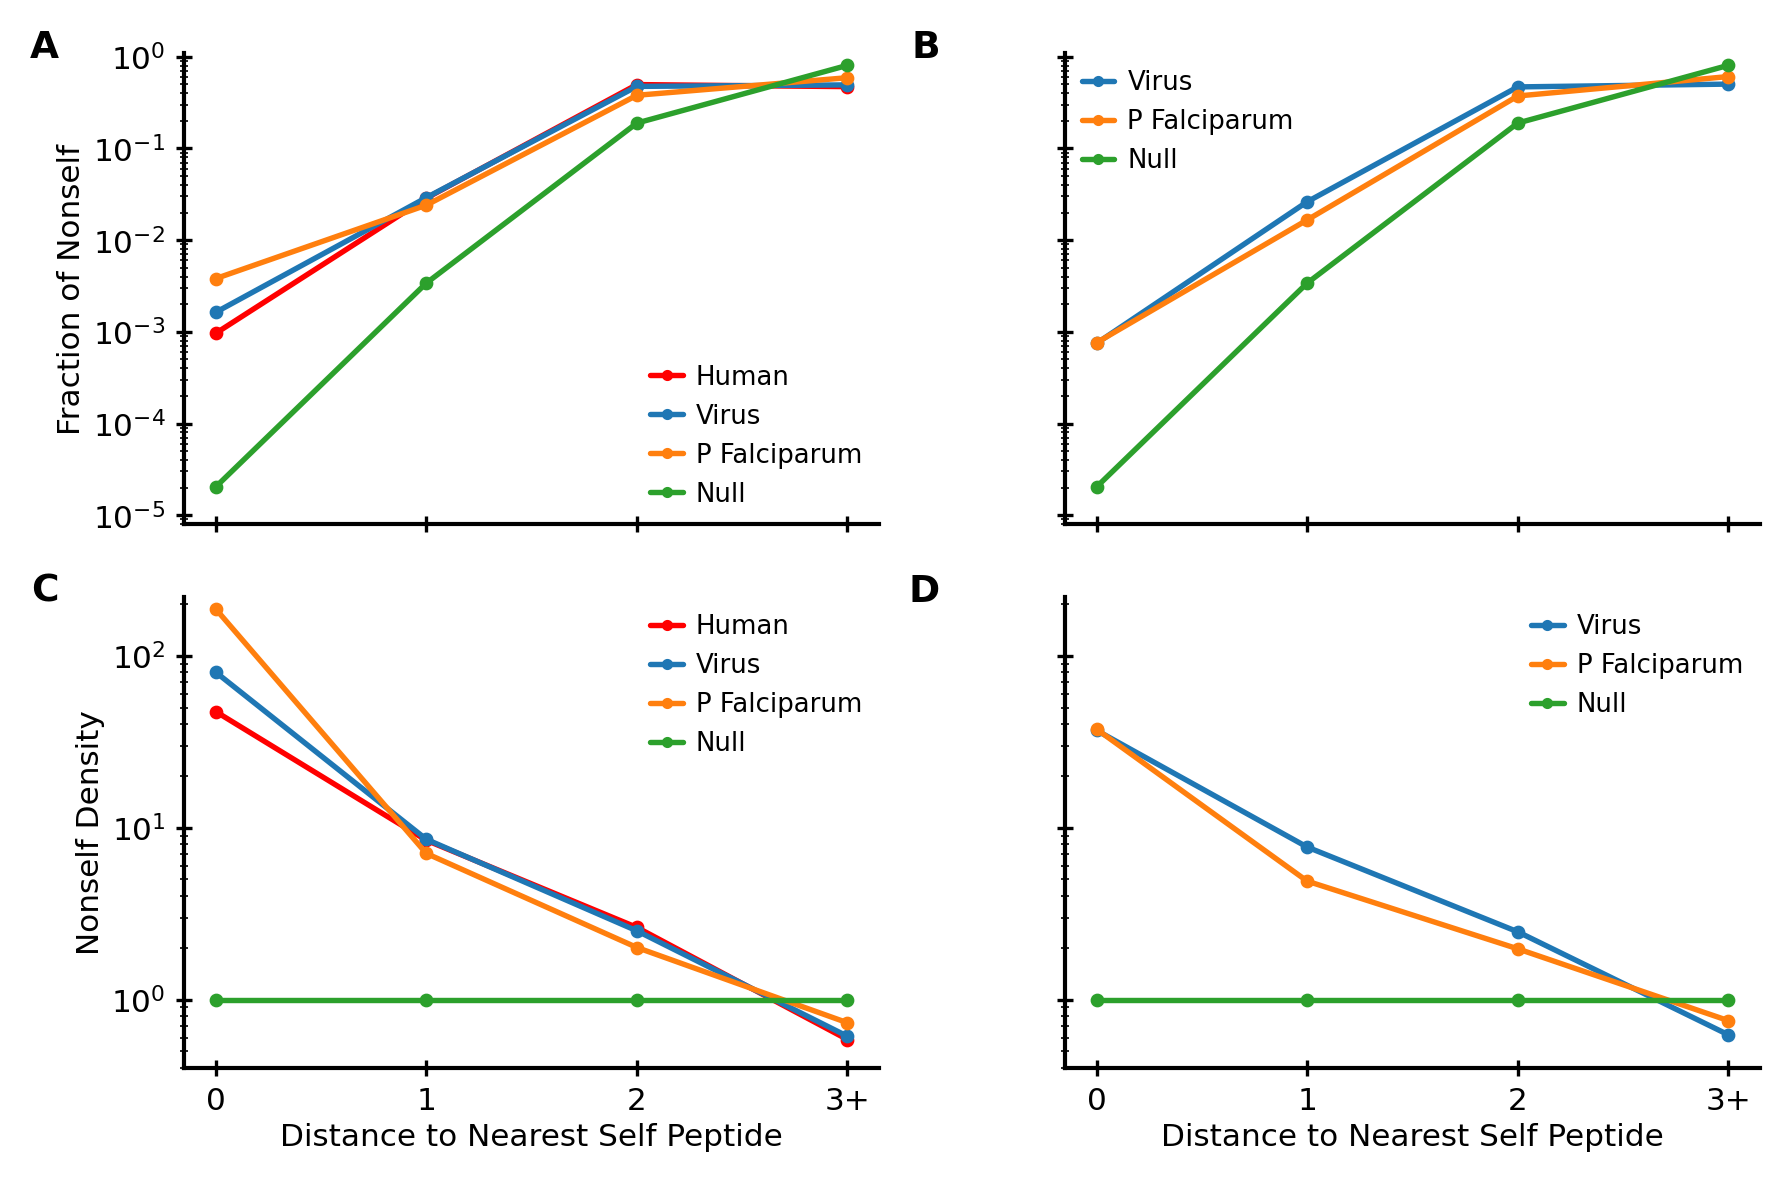

In [38]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Virus',
    'Humanviruses_train': 'Virus',
    'Malaria_nskewfcov': 'P Falciparum',
    'Malaria_train': 'P Falciparum',
    'Human_nskewfcov': 'Human',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(float)
for model in ['Human_nskewfcov', 'Humanviruses_train', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    if model == 'Human_nskewfcov':
        axes[0,0].plot(range(4), ps, '-o', color='red',label=model_to_label[model])
        axes[1,0].plot(range(4), ps/ps_flat, '-o', color='red',label=model_to_label[model])
    else:  
        axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
        axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Humanviruses_nskewfcov', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../alt_fig3.png')
# plt.savefig('../alt_fig3.svg')

Humanviruses_train error:
[5.56454865e-05 2.31696728e-04 6.88404286e-04 6.89175664e-04]
Humanviruses_train N:
526274.0
Humanviruses_nskewfcov error:
[3.77035128e-05 2.20290796e-04 6.87944340e-04 6.89218229e-04]
Humanviruses_nskewfcov N:
526264.0
uniform error:
[2.01644377e-06 2.60286258e-05 1.75200640e-04 1.76402426e-04]
uniform N:
5000000.0
Malaria_train error:
[4.36594575e-05 1.08665496e-04 3.44115848e-04 3.48393085e-04]
Malaria_train N:
1990342.0
Malaria_nskewfcov error:
[1.97694091e-05 9.16290190e-05 3.46810886e-04 3.49825873e-04]
Malaria_nskewfcov N:
1945891.0
uniform error:
[2.01644377e-06 2.60286258e-05 1.75200640e-04 1.76402426e-04]
uniform N:
5000000.0


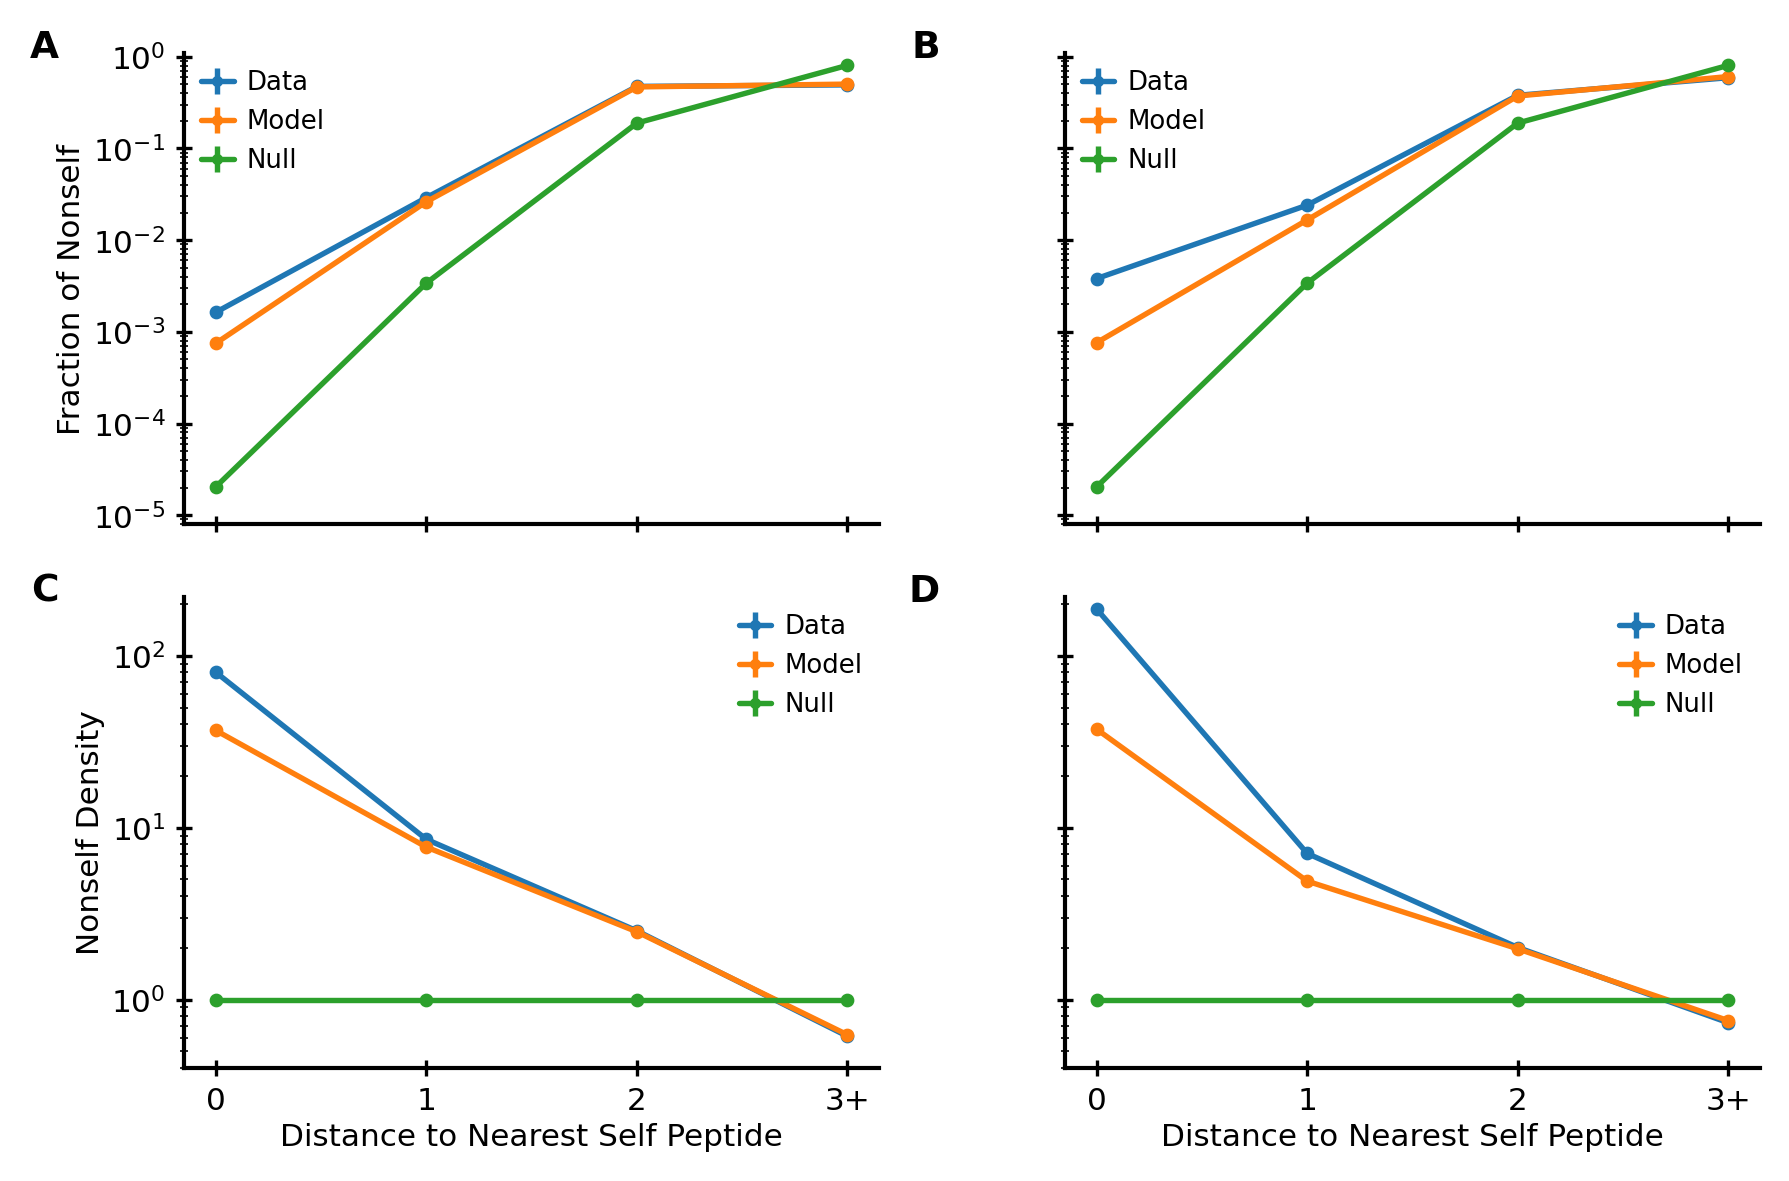

In [39]:
# with error bars

fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = np.array(ps_dict[model]).astype(np.float64)
    ns = np.array(ns_dict[model]).astype(np.float64)
    N = sum(ns)
    error = np.sqrt(ps*(1-ps)/N)
    print(model+" error:")
    print(error)
    print(model+" N:")
    print(N)
    axes[0,0].errorbar(range(4), ps, fmt='-o', yerr=error,label=model_to_label[model])
    axes[1,0].errorbar(range(4), ps/ps_flat, fmt='-o', yerr=error,label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = np.array(ps_dict[model]).astype(np.float64)
    ns = np.array(ns_dict[model]).astype(np.float64)
    N = sum(ns)
    error = np.sqrt(ps*(1-ps)/N)
    print(model+" error:")
    print(error)
    print(model+" N:")
    print(N)
    axes[0,1].errorbar(range(4), ps, fmt='-o', yerr=error,label=model_to_label[model])
    axes[1,1].errorbar(range(4), ps/ps_flat,fmt='-o', yerr=error,label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../fig3_not_annotated.png')
# plt.savefig('../fig3_not_annotated.svg')

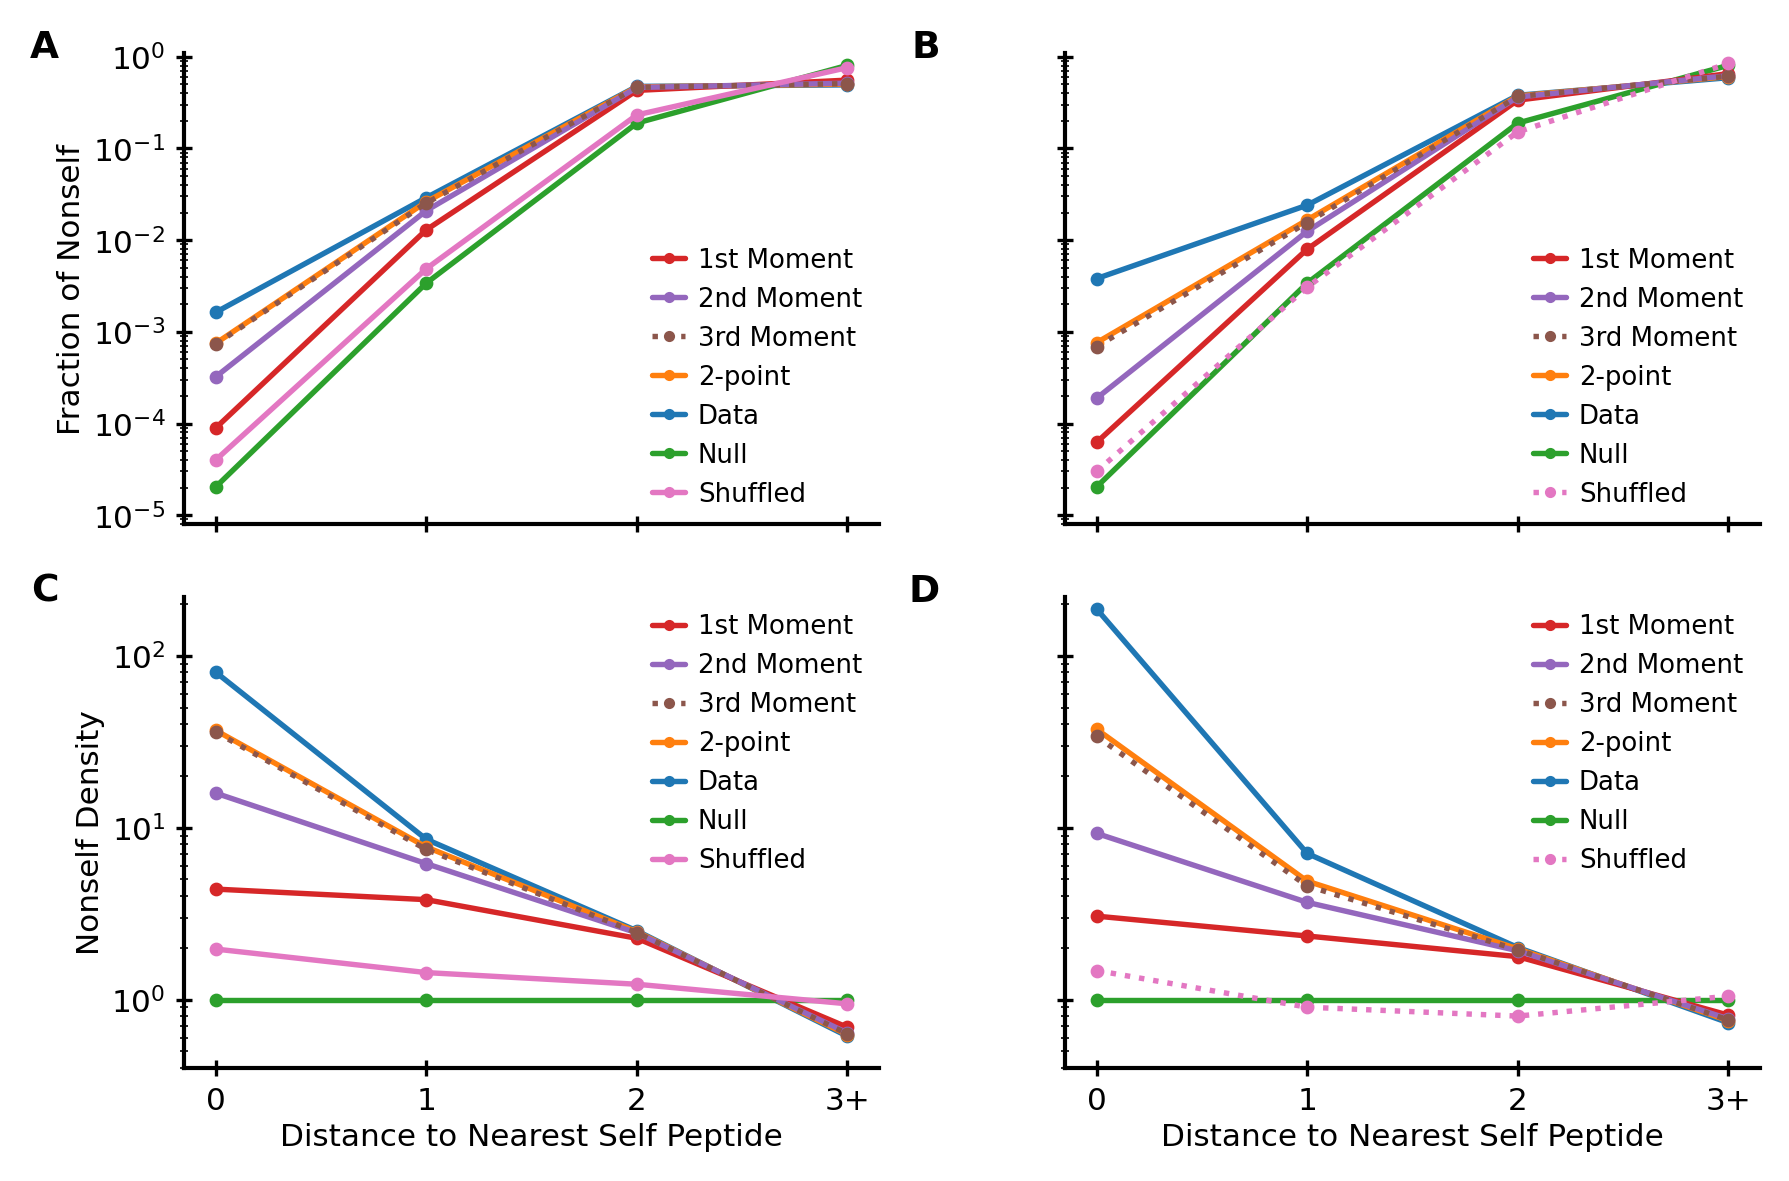

In [40]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': '1st Moment',
    'Humanviruses_nskewfcov': '2-point',
    'Humanviruses_ncov': '2nd Moment',
    'Humanviruses_nskew': '3rd Moment',
    'Humanviruses_train': 'Data',
    'Malaria_independent': '1st Moment',
    'Malaria_ncov': '2nd Moment',
    'Malaria_nskew': '3rd Moment',
    'Malaria_nskewfcov': '2-point',
    'Malaria_train': 'Data',
#     'Malaria_test': 'Malaria Train Data',
#     'Mouse_train': 'Mouse Data',
    'uniform': 'Null',
    'malaria_shuffled_independent': 'Shuffled',
    'malaria_shuffled_independent2': 'Shuffled',

    'virus_shuffled_independent': 'Shuffled'
}



# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for model in ['Humanviruses_train','Humanviruses_nskewfcov','uniform',
              'Humanviruses_independent', 'Humanviruses_ncov', 'Humanviruses_nskew','virus_shuffled_independent']:
    ps = ps_dict[model].astype(np.float64)
#     style = '-o' if ('uniform' not in model and 'shuffle' not in model) else '--o'
    if model in ['Humanviruses_nskew']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'
    axes[0,0].plot(range(4), ps,linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train','Malaria_nskewfcov',  'uniform',
              'Malaria_independent', 'Malaria_ncov', 'Malaria_nskew','malaria_shuffled_independent2']:
    ps = ps_dict[model].astype(np.float64)
    if model in ['Malaria_nskew','malaria_shuffled_independent2']:
        linestyle = 'dotted'
    else:
        linestyle = 'solid'    
    axes[0,1].plot(range(4), ps, linestyle=linestyle,marker='o',label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    new_order = [3, 4, 5,1,0,2,6]
    handles = [handles[i] for i in new_order]
    labels = [labels[i] for i in new_order]
    ax.legend(handles, labels)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../fig3_other_models_not_annotated.png')
# plt.savefig('../fig3_other_models_not_annotated.svg')

In [41]:
models = [
    "Listeria_train",
    "Listeria_nskewfcov",
    "StrepA_train",
    "StrepA_nskewfcov",
    "Tuberculosis_train",
    "Tuberculosis_nskewfcov",
    "Zebrafish_train",
    "Chicken_train"
    
]

In [42]:
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self_no_sampling.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

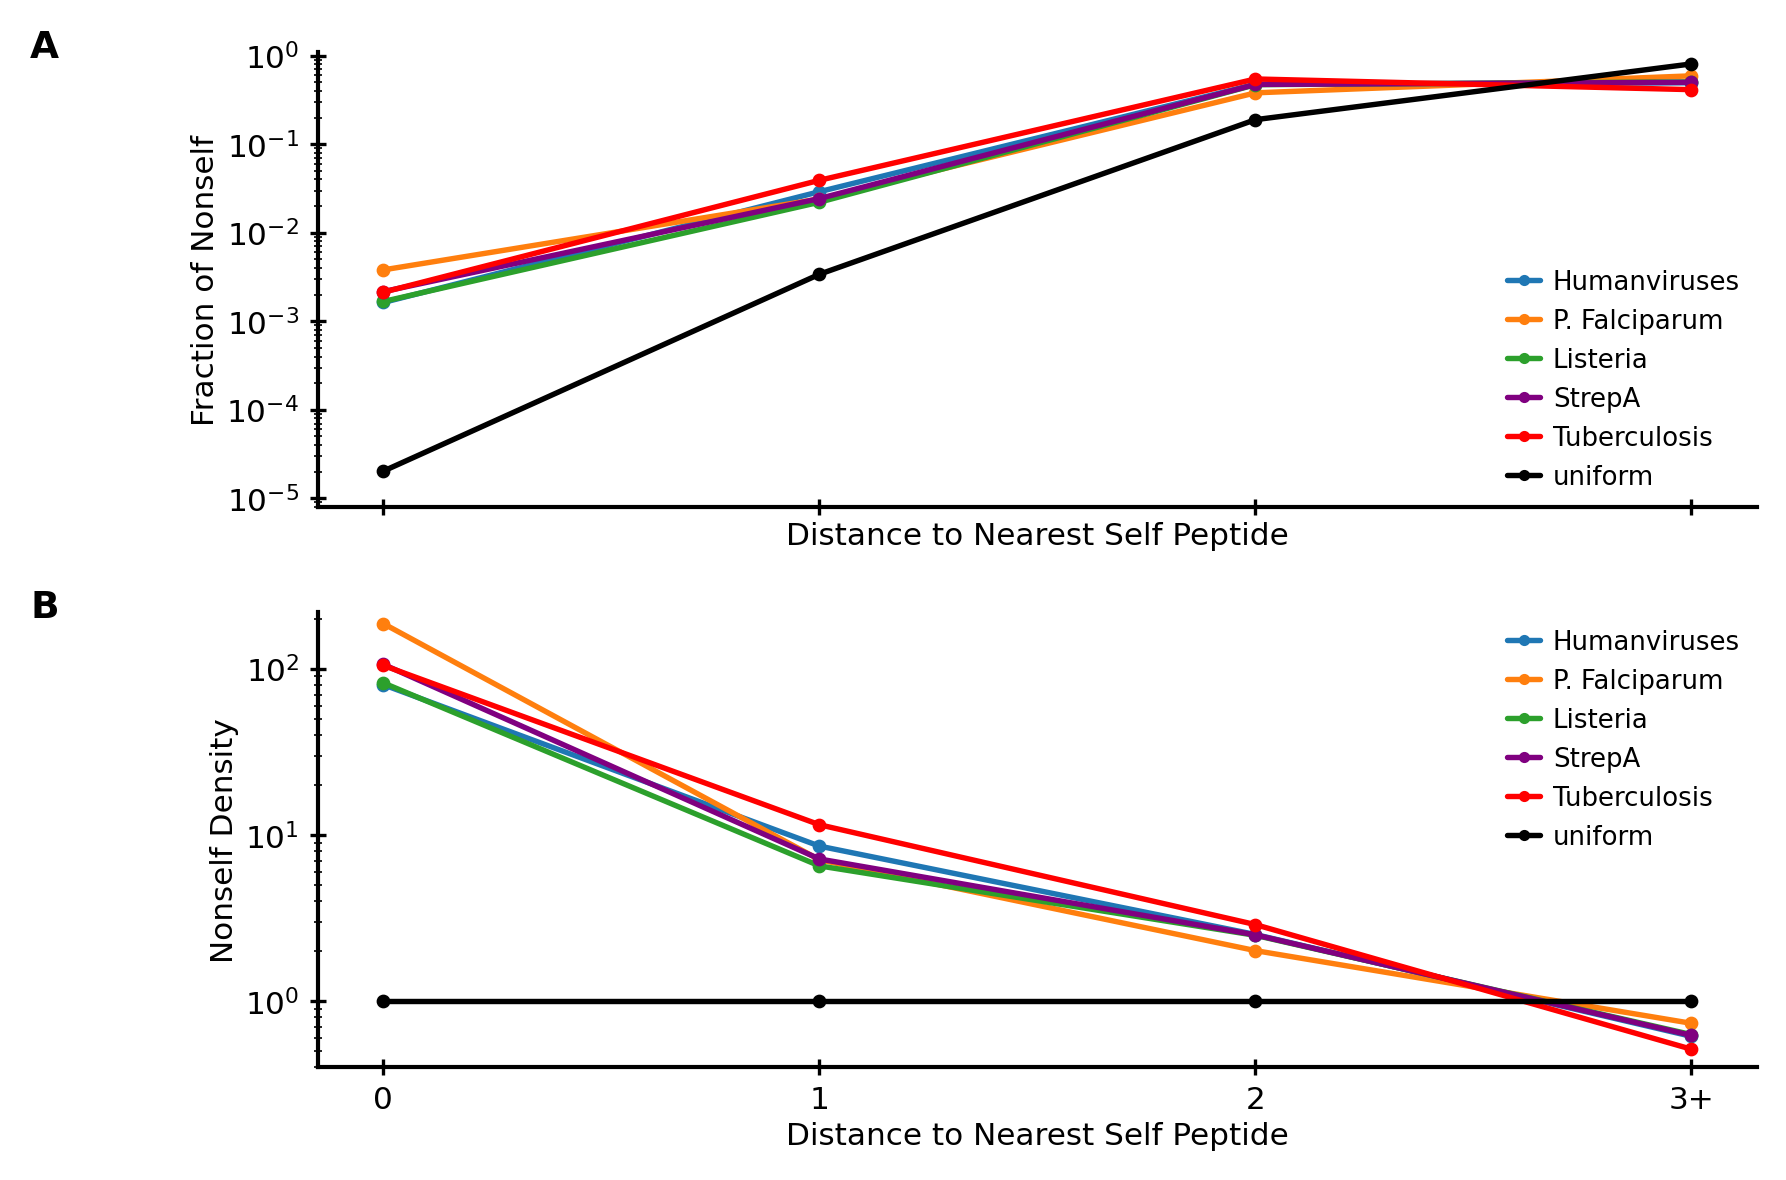

In [43]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=1,sharex=True)

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
coloring = [blue,orange,green,'purple','red','black']

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for i,model in enumerate(['Humanviruses_train','Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    axes[0].plot(range(4), ps, '-o', label=model.split("_")[0],color=coloring[i])
    axes[1].plot(range(4), ps/ps_flat, '-o', label=model.split("_")[0],color=coloring[i])
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels([0, 1, 2, '3+'])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1].set_yticks([1e0, 1e1, 1e2])
axes[1].set_ylim(4e-1, 2.2e2)

axes[0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[0].set_xlabel('Distance to Nearest Self Peptide')
axes[1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()


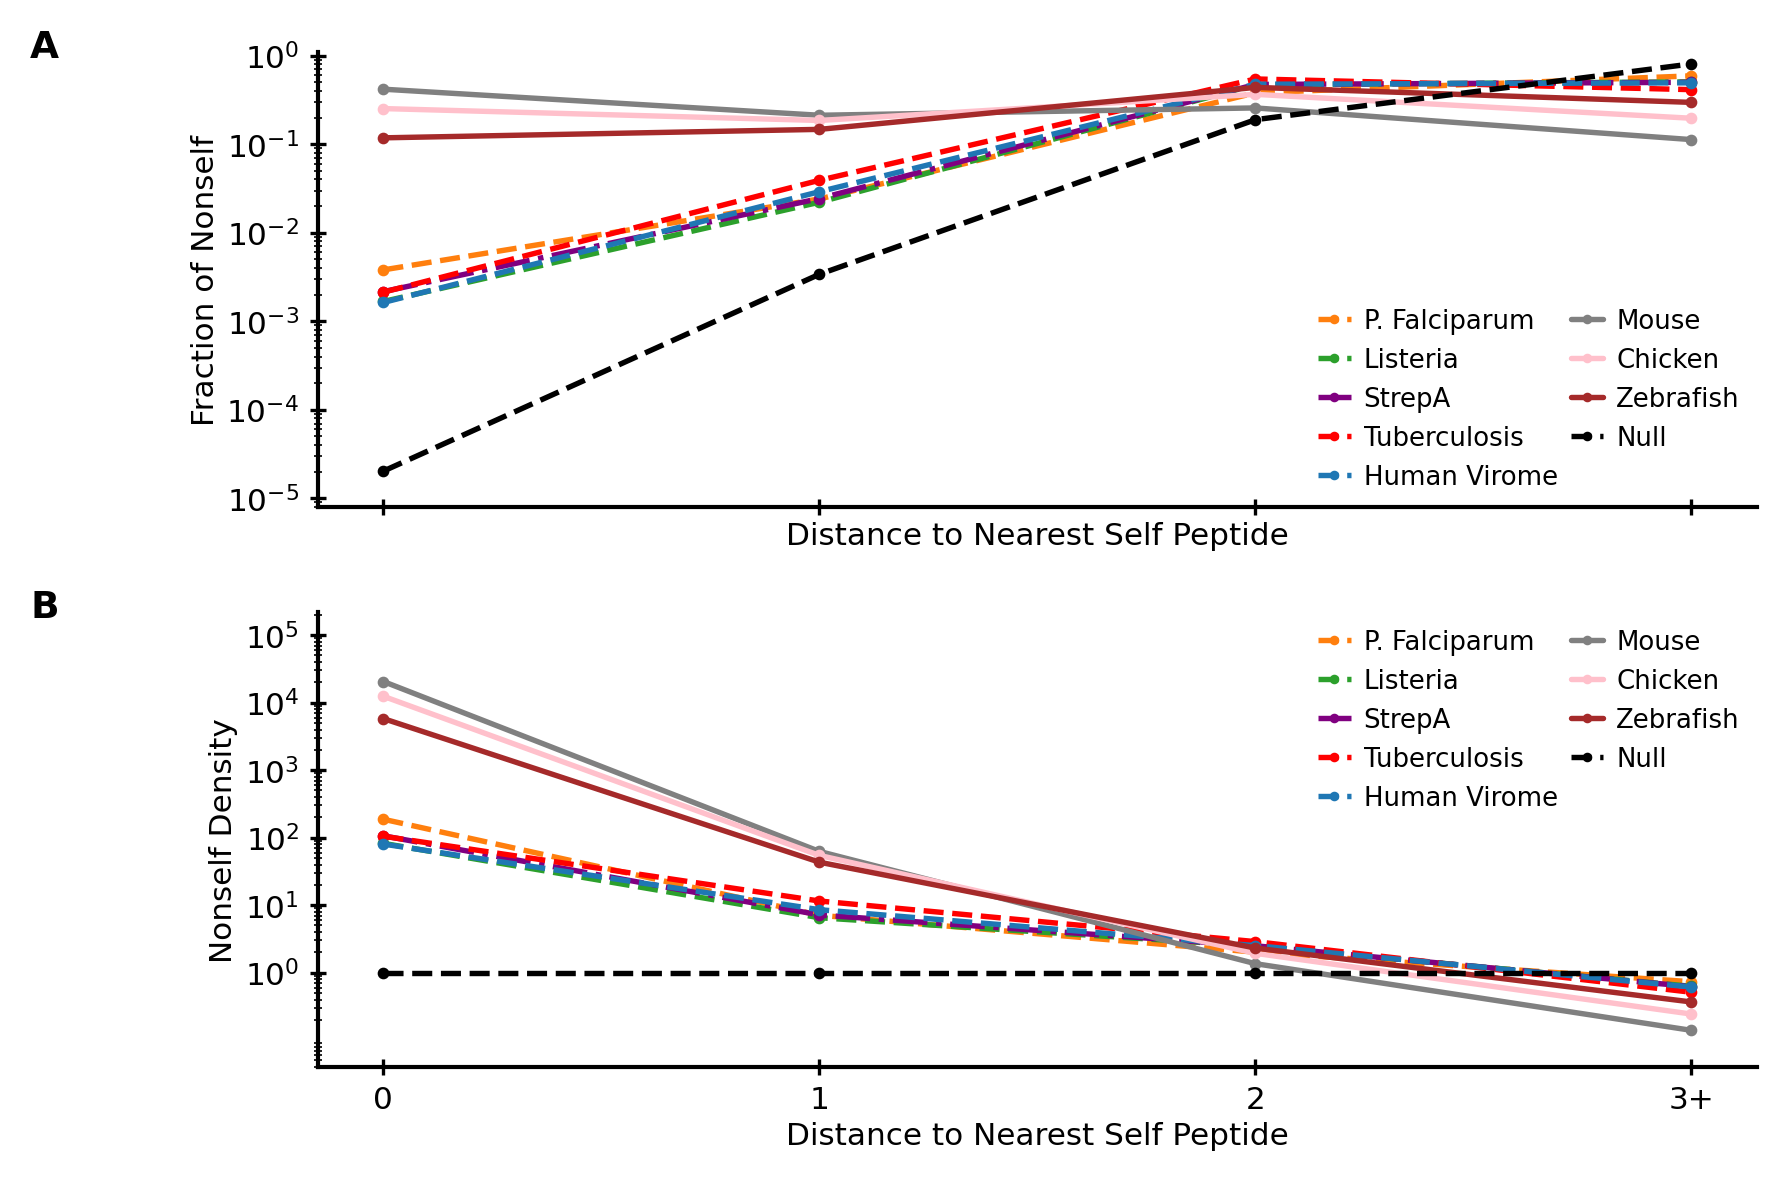

In [44]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=1,sharex=True)

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
coloring = [orange,green,'purple','red',blue,'gray','pink','brown','black']
linestyles = ['dashed','dashed','dashdot','dashed','dashed','solid','solid','solid','dashed']

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform'].astype(np.float64)
for i,model in enumerate(['Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','Humanviruses_train',
                          'Mouse_train','Chicken_train','Zebrafish_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    linestyle = linestyles[i]
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    elif model == 'Humanviruses_train':
        model = 'Human Virome'
    elif model == 'uniform':
        model = 'Null'
    axes[0].plot(range(4), ps, marker='o', linestyle=linestyle,markersize=2,label=model.split("_")[0],color=coloring[i])
    axes[1].plot(range(4), ps/ps_flat, linestyle=linestyle,marker='o', markersize=2,label=model.split("_")[0],color=coloring[i])
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend(ncol=2)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels([0, 1, 2, '3+'])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1].set_yticks([0,1e0, 1e1, 1e2,1e3,1e4,1e5])
axes[1].set_ylim(4e-2, 2.2e5)

axes[0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[0].set_xlabel('Distance to Nearest Self Peptide')
axes[1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()


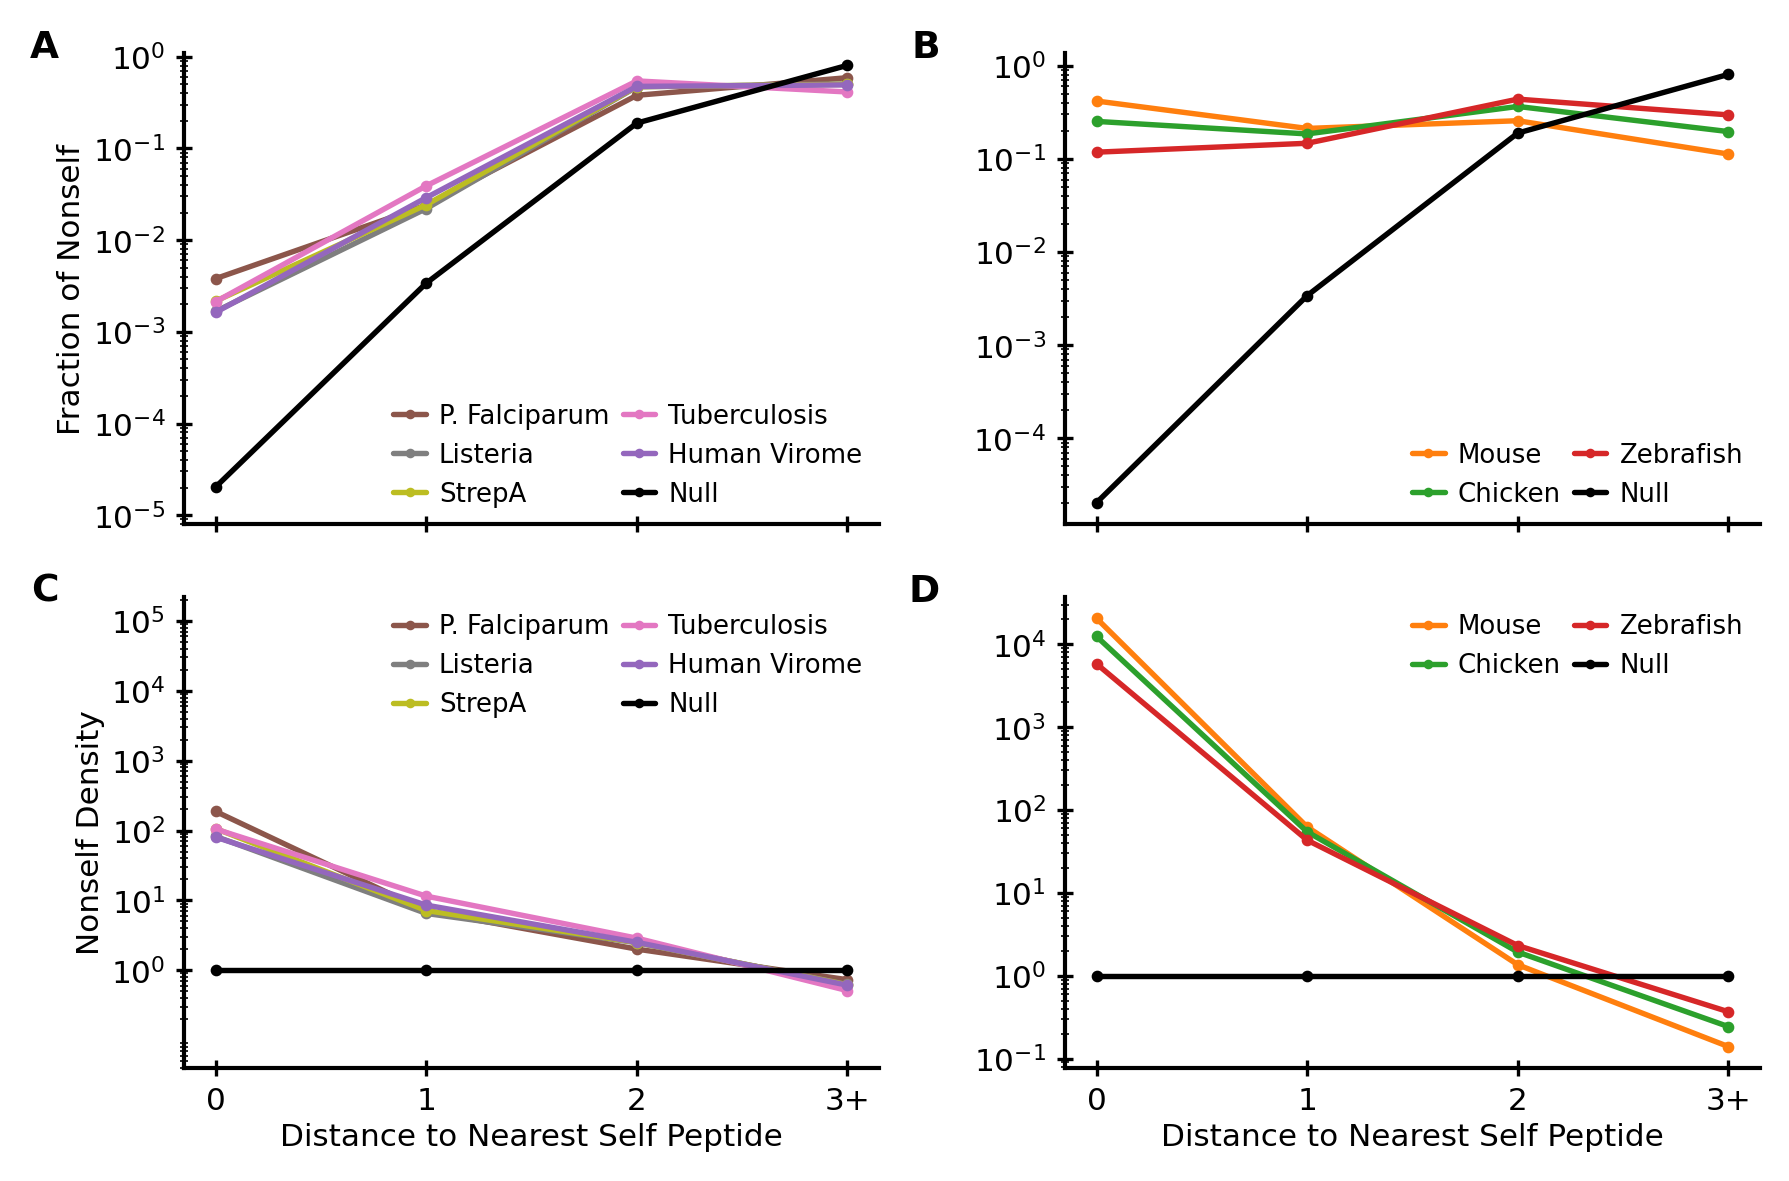

In [45]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2,sharex=True)

    
ps_flat = ps_dict['uniform'].astype(np.float64)


coloring = {
    'Mouse_train': '#ff7f0e',
    'Chicken_train': '#2ca02c',
    'Zebrafish_train': '#d62728',
    'Humanviruses_train': '#9467bd',
    'Malaria_train': '#8c564b',
    'Tuberculosis_train': '#e377c2',
    'Listeria_train': '#7f7f7f',
    'StrepA_train': '#bcbd22',
    'uniform': 'black',
    'Null': 'black'
}

for i,model in enumerate(['Malaria_train','Listeria_train', 'StrepA_train', 'Tuberculosis_train','Humanviruses_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
    c = coloring[model]
#     linestyle = linestyles[i]
    if model == 'Malaria_train':
        model = 'P. Falciparum_'
    elif model == 'Humanviruses_train':
        model = 'Human Virome'
    elif model == 'uniform':
        model = 'Null'
    axes[0,0].plot(range(4), ps, marker='o', linestyle='solid',markersize=2,label=model.split("_")[0],color=c)
    axes[1,0].plot(range(4), ps/ps_flat, linestyle='solid',marker='o', markersize=2,label=model.split("_")[0],color=c)
#     axes[0,0].set_title('Human Viruses')
    

# for i,model in enumerate(['Listeria_nskewfcov', 'StrepA_nskewfcov', 'Tuberculosis_nskewfcov','uniform']):
#     ps = ps_dict[model].astype(np.float64)
#     axes[0].plot(range(4), ps, linestyle='dotted',marker='o', color=coloring[i])
#     axes[1].plot(range(4), ps/ps_flat, linestyle='dotted',marker='o', color=coloring[i])
# #     axes[0,1].set_title('P. Falciparum')

for i,model in enumerate(['Mouse_train','Chicken_train','Zebrafish_train','uniform']):
    ps = ps_dict[model].astype(np.float64)
#     linestyle = linestyles[i]
    if model == 'uniform':
        model = 'Null'
    axes[0,1].plot(range(4), ps, marker='o', linestyle='solid',markersize=2,label=model.split("_")[0],color=coloring[model])
    axes[1,1].plot(range(4), ps/ps_flat, linestyle='solid',marker='o', markersize=2,label=model.split("_")[0],color=coloring[model])


for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend(ncol=2)
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0,0].set_xticks([0, 1, 2, 3])
axes[0,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))

axes[1,0].set_yticks([0,1e0, 1e1, 1e2,1e3,1e4,1e5])
axes[1,0].set_ylim(4e-2, 2.2e5)

axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
# plt.savefig('../all_species_distance_to_self.svg')
# plt.savefig('../all_species_distance_to_self.png')
